In [1]:
import sys 
sys.path = sys.path + ['', '/Users/yxin/Documents', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python38.zip', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/lib-dynload', '/Users/yxin/Library/Python/3.8/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages']

from fastai.vision.all import *
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
import random

In [2]:
os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

['paper', '.DS_Store', 'metal', 'cardboard', 'trash', 'glass', 'plastic']

In [ ]:

## splits indices for a folder into train, validation, and test indices with random sampling
    ## input: folder path
    ## output: train, valid, and test indices    
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [ ]:
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join('dataset-resized',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    ## I use data/test here because the images can be mixed up
    move_files(test_source_files,"data/test")

In [3]:
## get a path to the folder with images
path = Path(os.getcwd())/"data"
path

Path('/Users/yxin/Desktop/4220 Project/data')

In [4]:
# tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataLoaders.from_folder(path,test="test",bs=16)

In [ ]:
# data.show_batch(figsize=(10,8))

In [5]:
learn = cnn_learner(data, resnet34, metrics=error_rate)

In [ ]:
learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot()

In [7]:
learn.fit_one_cycle(1,max_lr=5.13e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.228747,0.551079,0.200000,23:41


In [8]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

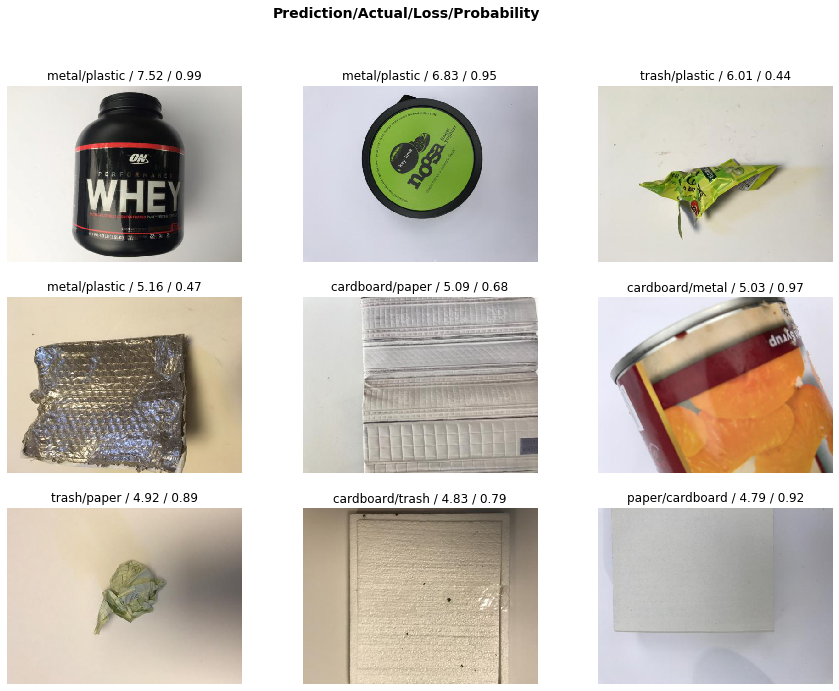

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

Interpretation.plot_top_losses(k, largest=True, **kwargs)
None

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


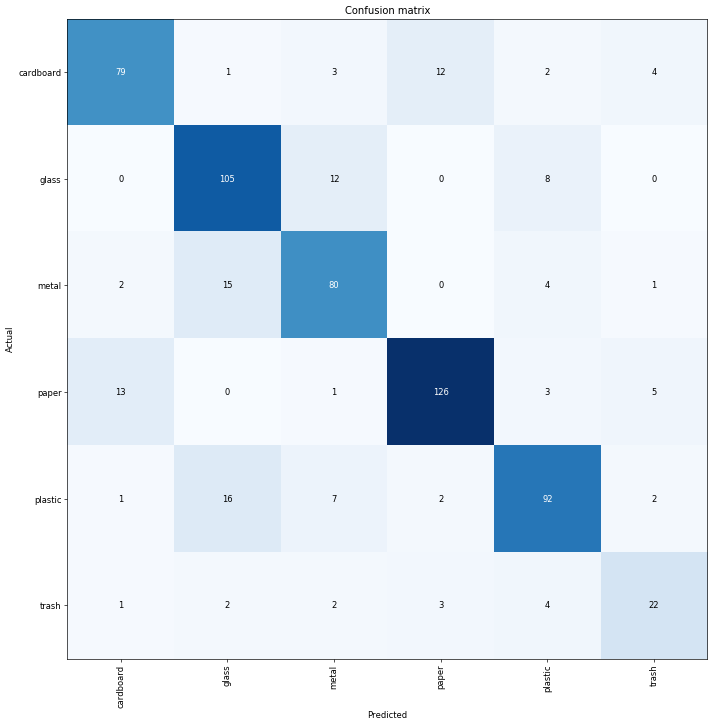

In [10]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [11]:
interp.most_confused(min_val=2)

[('plastic', 'glass', 16),
 ('metal', 'glass', 15),
 ('paper', 'cardboard', 13),
 ('cardboard', 'paper', 12),
 ('glass', 'metal', 12),
 ('glass', 'plastic', 8),
 ('plastic', 'metal', 7),
 ('paper', 'trash', 5),
 ('cardboard', 'trash', 4),
 ('metal', 'plastic', 4),
 ('trash', 'plastic', 4),
 ('cardboard', 'metal', 3),
 ('paper', 'plastic', 3),
 ('trash', 'paper', 3),
 ('cardboard', 'plastic', 2),
 ('metal', 'cardboard', 2),
 ('plastic', 'paper', 2),
 ('plastic', 'trash', 2),
 ('trash', 'glass', 2),
 ('trash', 'metal', 2)]

In [12]:
preds = learn.get_preds(ds_type=DatasetType.Test)

NameError: name 'DatasetType' is not defined